## Load packages and parameter configuration

In [65]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from datetime import date
import math
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

start_date = '2015-11-25' # Data start date (inclusive)
end_date = '2018-11-24' # Data end date (exclusive)
path = f'./data/VTI_{start_date}_{end_date}' # Path of downloaded data file

## Load data

In [35]:
X_train = pd.read_csv(f'{path}/X_train.csv')
y_train = pd.read_csv(f'{path}/y_train.csv')

X_cv = pd.read_csv(f'{path}/X_cv.csv')
y_cv = pd.read_csv(f'{path}/y_cv.csv')

X_test = pd.read_csv(f'{path}/X_test.csv')
y_test = pd.read_csv(f'{path}/y_test.csv')

In [43]:
df_train = pd.read_csv(f'{path}/df_train.csv')
df_cv = pd.read_csv(f'{path}/df_cv.csv')
df_test = pd.read_csv(f'{path}/df_test.csv')

## Initial model training

In [36]:
n_estimators = 100             
max_depth = 3                  
learning_rate = 0.1            
min_child_weight = 1           
subsample = 1                  
colsample_bytree = 1           
colsample_bylevel = 1          
train_test_split_seed = 111    
model_seed = 100

In [37]:
# Initiate the model
model = XGBRegressor(seed=model_seed,
                      n_estimators=n_estimators,
                      max_depth=max_depth,
                      learning_rate=learning_rate,
                      min_child_weight=min_child_weight)

# Train the regressor
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
def evaluate_model(y_true, y_pred):
    """
    Input: true y and predicted y
    Return: Dataframe of RMSE and MAPE
    """
    rmse = mean_squared_error(y_true, y_pred)**0.5 # root mean squared error
    mape = mean_absolute_percentage_error(y_true, y_pred) # mean absolute percentage error
    
    evaluation = pd.DataFrame({'RMSE':[rmse],'MAPE':[mape]})
    return evaluation

### Performance on training set

In [39]:
# Predict on train set
y_pred = model.predict(X_train)

evaluate_model(y_train, y_pred)

,RMSE,MAPE
0,0.394856,0.002927


### Performance on test set

In [40]:
# Predict on test set
y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred)

,RMSE,MAPE
0,16.910816,0.12272


In [49]:
# Convert data type
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_cv['Date'] = pd.to_datetime(df_cv['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Create dataframe to store forecast data
df_forecast_test = pd.DataFrame({'Date':df_test['Date'],
                                'Forecast':y_pred})

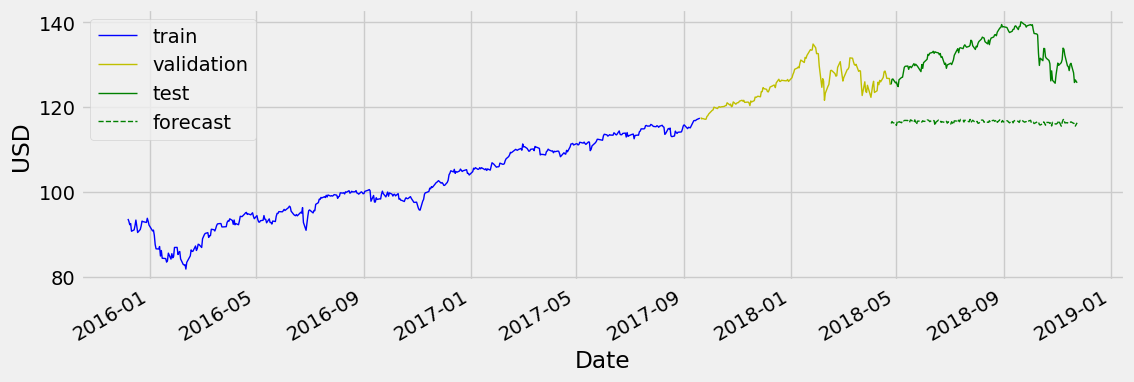

In [63]:
fig, ax = plt.subplots(figsize=(12,4))

df_train.plot(x='Date', y='AdjClose', style='b', linewidth=1, ax=ax)
df_cv.plot(x='Date', y='AdjClose', style='y', linewidth=1, ax=ax)
df_test.plot(x='Date', y='AdjClose', style='g', linewidth=1, ax=ax)
df_forecast_test.plot(x='Date', y='Forecast', style='g', linestyle='dashed', linewidth=1, ax=ax)

ax.legend(['train','validation','test','forecast'])
ax.set_xlabel('Date')
ax.set_ylabel('USD')

plt.show()

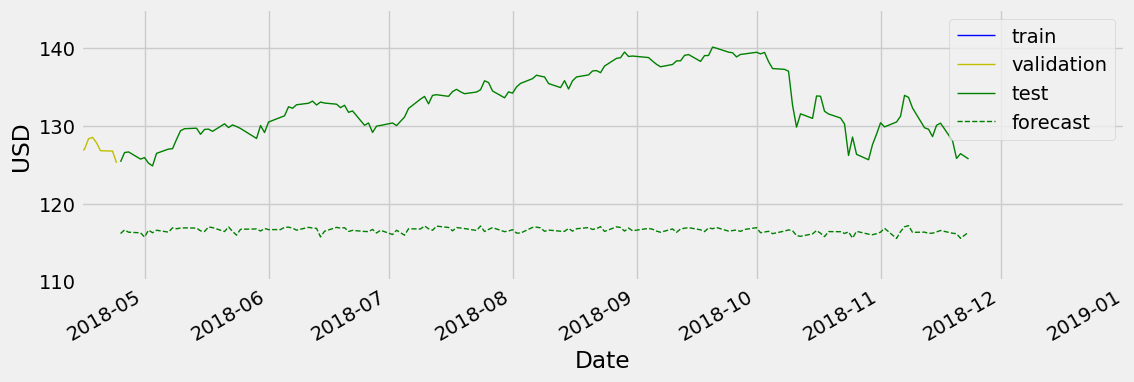

In [66]:
fig, ax = plt.subplots(figsize=(12,4))

df_train.plot(x='Date', y='AdjClose', style='b', linewidth=1, ax=ax)
df_cv.plot(x='Date', y='AdjClose', style='y', linewidth=1, ax=ax)
df_test.plot(x='Date', y='AdjClose', style='g', linewidth=1, ax=ax)
df_forecast_test.plot(x='Date', y='Forecast', style='g', linestyle='dashed', linewidth=1, ax=ax)

ax.legend(['train','validation','test','forecast'])
ax.set_xlabel('Date')
ax.set_ylabel('USD')
ax.set_xlim([date(2018, 4, 15), date(2019, 1, 1)])
ax.set_ylim(110, 145)

plt.show()